In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

### 1. Skewness



In this section I might drop the word "moment" a few times. There are some standardised ways of quantifying "moments". The first moment is zero by definition. The second is variance. The third is skewness, which is often defined as $\gamma_1$.

$$ \gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}} = \frac{E[(x-\mu)^3]}{E[(x-\mu)^2]^{3/2}} $$




- te y ze wzoru to gamma
#### Skewness it's a measure of assymetry in a distribution

![image.png](skewness.png)

In [3]:
data = np.loadtxt('dataset.txt')

In [25]:
# trzeba pamiętać o bias, dla populacji i dla próby

# oliczanie skośności zależy też od rodzaju 'szeregu' - https://www.youtube.com/watch?v=xuVLs4W63sA&ab_channel=Rados%C5%82awMurkowski

skewness = st.skew(data, bias=True)
skewness

0.7408773663373577

#### - skewness plot

In [9]:
mean = np.mean(data)
std = np.std(data)

#### - ten wykres nie jest poprawny, ponieważ skośność zmienia średnią

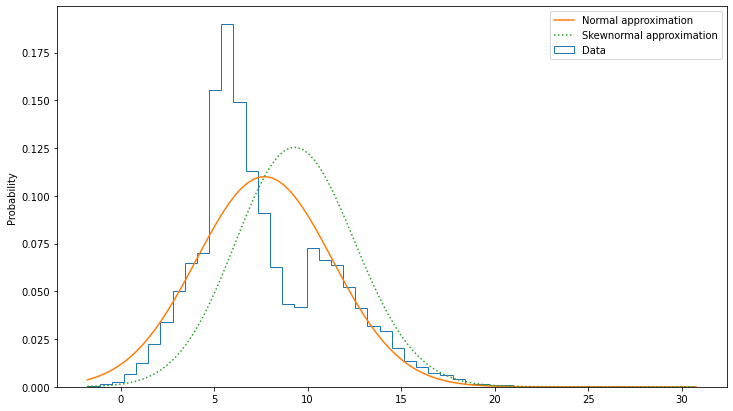

In [16]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.figure(figsize=(12,7))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, ls=':', label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

#### - poprawny wykres - przy pomocy scipy dopasowujemy skośność do danych

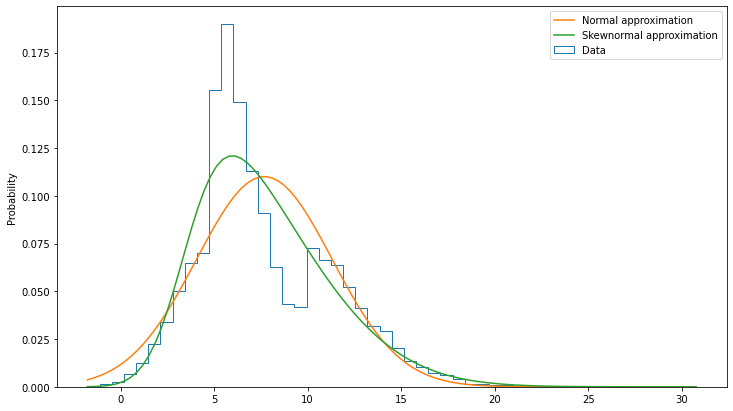

In [18]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.figure(figsize=(12,7))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

### 2. Kurtosis


The next moment, and the last one we'll consider is kurtosis. It has a similar definition, and is often represented as $\kappa$ or $\gamma_2$:

$$ \kappa = \frac{E[(x-\mu)^4]}{E[(x-\mu)^2]^{4/2}} $$

In [20]:
kurtosis = st.kurtosis(data, fisher=False)
kurtosis

3.5517538497309498